# Data Analysis with Pandas

### Background

Pandas is a popular data analysis library for python. 

Go to the main website https://pandas.pydata.org now.

Panda is pre-installed on conda, so no need to install. Go straight to the "Getting started" section.

Spend a few minutes browsing the documentations and familiarise yourself with the main functionalities that the pandas library provides for data science.

Here are some guiding questions for your initial reading:

1. What is a `DataFrame` and for what is it used?
2. If you're already familiar with Excel, how is a pandas DataFrame similar/different to an Excel spreadsheet?
3. What type of data can be stored in a pandas DataFrame?
4. What are common operations on DataFrames?

## A simple code example

Read the following python codes that first creates a new pandas DataFrame and then perform some simple operations on them. 

Then solve the exercises below by adapting the example code and look at the additional reading.

In [3]:
import pandas as pd

# construct a data frame (from two lists) and display it
name_column = ['Peter', 'Paul', 'Mary', 'Jo']
age_column = [42, 23, 73, 16]
dfr = pd.DataFrame({'Name': name_column, 'Age': age_column})
dfr

,Name,Age
0,Peter,42
1,Paul,23
2,Mary,73
3,Jo,16


In [4]:
# add a column
dfr['Student'] = [True, True, False, False]
dfr

,Name,Age,Student
0,Peter,42,True
1,Paul,23,True
2,Mary,73,False
3,Jo,16,False


In [5]:
# Display only rows that are students
dfr[ dfr['Student'] == True ]

,Name,Age,Student
0,Peter,42,True
1,Paul,23,True


In [7]:
# Sort the data frame by age
dfr.sort_values(by='Age')

,Name,Age,Student
3,Jo,16,False
1,Paul,23,True
0,Peter,42,True
2,Mary,73,False


In [8]:
# Note that subsetting students and sorting by age does not change 
# the original dataframe `dfr`. dfr is still the same as when we 
# first constructed it
dfr

,Name,Age,Student
0,Peter,42,True
1,Paul,23,True
2,Mary,73,False
3,Jo,16,False


In [9]:
# To save a changed version of the data frame, store it
# as a new object, for example like this:
students = dfr[ dfr['Student'] == True ]
students

,Name,Age,Student
0,Peter,42,True
1,Paul,23,True


### Exercises

1. Create a new DataFrame `uk_gdp` with 2 columns: `Year` containing the numbers from 2000 to the current year, and `GDP` containing the UK's GDP. (Look up the data on wikipedia or elsewhere.)
2. Sort the DataFrame by increasing GDP.
3. Read the section on "Filtering specific rows of a DataFrame" on the pandas website. Pick some suitable GDP threshold and create a new DataFrame called `above` that contains only the years and GDP values where GDP was above the chosen threshold.
4. Skim the help file on the `to_csv` method by typing `uk_gdp.to_csv()` in Jupyter, and hitting Shift+Tab. Read the examples section at the bottom.
5. Write the `uk_gdp` data frame to a csv file called `uk_gdp.csv`.
6. Open the saved csv file in Excel. Make some changes to the data in Excel and save the file (in csv format). Then read the modified file back into a DataFrame in Jupyter, using the `pd.read_csv` function and ensure that the changes you made in Excel have been made.
7. Play around with what you learned a bit more, for example by creating DataFrames (in Jupyter or even in Excel) with different data, adding new columns to the GDP data frame, different filtering operations, etc.

### Solutions

In [10]:
# 2001 to 2020, from macrotrends.net, UK GDP in trillions USD, rounded
year_col = [y for y in range(2001, 2021)] 
gdp_col = [1.6, 1.8, 2.1, 2.4, 2.5, 2.7, 3.1, 2.9, 2.4, 2.4, 
           2.7, 2.7, 2.8, 3.1, 2.9, 2.7, 2.7, 2.9, 2.8, 2.7]
uk_gdp = pd.DataFrame({'Year':year_col, 'GDP':gdp_col})

# sort by gdp
uk_gdp.sort_values(by='GDP')

# only disply gdp > 3 trillion USD
thresh = 3.0
uk_gdp[ uk_gdp['GDP'] > thresh ]

# write to csv file
uk_gdp.to_csv("uk_gdp.csv")

# after making some changes to the file in excel, read it back into jupyter
uk_gdp_new = pd.read_csv("uk_gdp.csv")
uk_gdp_new

,Unnamed: 0,Year,GDP
0,0,2001,1.6
1,1,2002,1.8
2,2,2003,2.1
3,3,2004,2.4
4,4,2005,2.5
5,5,2006,2.7
6,6,2007,3.1
7,7,2008,2.9
8,8,2009,2.4
9,9,2010,2.4


# Analysis of UK traffic accidents

### Data

The comma-separated values (csv) file “Road Safety Data - Accidents 2019” was downloaded from
https://data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data You can download more recent data from that website, or simply work with the 2019 data provided here.

The spreadsheet "Road Safety Open Dataset Data Guide" (under "Supporting Documents") contains explanation of numerical codes used in the csv file.

### Exploratory data analysis

Carefully read and execute the following data analysis code. 

Study the code by printing some intermediate results and by reading the documentation of some key functions used.

Add some comments to the code to clarify what's happening. 

Then go on to answering the questions below.

In [11]:
import pandas as pd
accidents = pd.read_csv('accidents2019.csv', parse_dates=False)

/tmp/ipykernel_207734/1288861993.py:2: DtypeWarning: Columns (0,31) have mixed types. Specify dtype option on import or set low_memory=False.
  accidents = pd.read_csv('accidents2019.csv', parse_dates=False)


In [12]:
accidents['Date'] = pd.to_datetime(accidents['Date'], format='%d/%m/%Y')

In [13]:
xmas_ruined = accidents[ accidents['Date'] == pd.to_datetime('2019-12-25') ]
xmas_ruined.shape[0]

138

In [14]:
# look up LSOA by postcode at 
# https://imd-by-postcode.opendatacommunities.org/imd/2019
unexe_lsoa = "E01020016"
unexe = accidents[ accidents["LSOA_of_Accident_Location"] == unexe_lsoa]
unexe

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
97754,2019500808088,292606.0,92821.0,-3.522887,50.725043,50,3,2,1,2019-01-10,...,0,0,1,1,1,0,0,1,2,E01020016
97759,2019500808419,292218.0,92290.0,-3.528227,50.720198,50,3,2,1,2019-01-09,...,0,0,4,1,1,0,0,1,2,E01020016
98368,2019500829748,292601.0,92835.0,-3.522962,50.725168,50,3,2,1,2019-03-27,...,0,0,1,1,1,0,0,1,2,E01020016
98716,2019500841045,292089.0,92255.0,-3.530043,50.719859,50,3,1,1,2019-04-26,...,0,5,1,2,2,0,0,1,1,E01020016
98813,2019500844301,292290.0,92096.0,-3.527151,50.718467,50,3,2,1,2019-05-23,...,0,0,1,1,1,0,0,1,2,E01020016
99137,2019500854163,292189.0,92230.0,-3.528620,50.719653,50,3,2,1,2019-06-16,...,0,0,1,1,1,0,0,1,1,E01020016
99504,2019500869280,291931.0,92392.0,-3.532321,50.721061,50,3,2,1,2019-08-05,...,0,0,1,1,1,0,0,1,2,E01020016
99903,2019500883534,291985.0,92266.0,-3.531519,50.719939,50,2,2,1,2019-08-10,...,0,0,1,4,2,0,0,1,1,E01020016
100051,2019500887743,291737.0,92345.0,-3.535054,50.720603,50,3,1,1,2019-09-19,...,0,0,1,1,1,0,0,1,1,E01020016
100243,2019500891889,291828.0,92232.0,-3.533733,50.719604,50,3,1,1,2019-09-20,...,0,5,7,1,1,0,0,1,2,E01020016


In [15]:
# number of accidents by severity: 1 is fatal, 2 is serious, 3 is mild
accidents.value_counts(['Accident_Severity'])

Accident_Severity
3                    92456
2                    23422
1                     1658
dtype: int64

In [16]:
# percentage of accidents by severity
accidents.value_counts(['Accident_Severity'], normalize=True)

Accident_Severity
3                    0.786619
2                    0.199275
1                    0.014106
dtype: float64

In [17]:
# how many rows and columns does the data frame have?
accidents.shape

(117536, 32)

In [18]:
# Create a new data frame locations that only consists of the 
# `Latitude` and `Longitude` column of `accidents`.
locations = accidents[['Latitude','Longitude']]
locations

,Latitude,Longitude
0,51.508057,-0.153842
1,51.436208,-0.127949
2,51.526795,-0.124193
3,51.546387,-0.191044
4,51.541121,-0.200064
...,...,...
117531,55.047323,-3.368899
117532,55.215407,-2.983499
117533,54.991685,-3.274645
117534,55.148292,-2.997491


In [19]:
# Permanently remove the columns `Location_Easting_OSGR`, `Location_Northing_OSGR`
accidents.drop(['Location_Easting_OSGR', 'Location_Northing_OSGR'], axis=1, inplace=True)

In [20]:
# Reorder the rows of the data frame by increasing Date and Time, 
# and store the new ordering
accidents.sort_values(['Date', 'Time'], inplace=True)
accidents

,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
65479,2019320634369,-0.201080,52.781682,32,2,2,1,2019-01-01,3,00:06,...,0,0,6,1,1,0,0,1,1,E01026262
14,2019010155220,-0.170889,51.496210,1,3,3,1,2019-01-01,3,00:20,...,0,0,4,1,1,0,0,1,1,E01002821
68172,2019350810982,0.159444,52.676285,35,3,2,1,2019-01-01,3,00:28,...,0,0,4,1,1,0,0,1,1,E01018108
58629,2019230353185,-1.391543,52.506762,23,2,1,1,2019-01-01,3,00:30,...,0,0,6,1,1,0,0,2,1,E01031182
34803,2019070000684,-2.376181,53.360964,7,2,1,1,2019-01-01,3,00:34,...,0,0,6,1,1,0,0,2,1,E01018648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117423,2019980938595,-3.594977,54.926262,98,2,1,1,2019-12-31,3,23:42,...,0,0,4,1,1,0,0,2,1,NaN
24824,2019010228016,-0.192109,51.536988,1,3,1,1,2019-12-31,3,23:45,...,-1,1,4,2,2,0,-1,1,3,E01000930
79062,2019420914629,0.527620,51.789244,42,2,2,1,2019-12-31,3,23:45,...,0,0,6,1,2,0,0,2,1,E01021537
24822,2019010228000,-0.182246,51.527942,1,3,2,1,2019-12-31,3,23:50,...,0,0,4,1,1,0,0,1,1,E01004701


In [21]:
# Add a column `hour` with values 0,1,2,. . . ,23 corresponding to the time of day.
accidents['hour'] = pd.to_datetime(accidents['Time'], format="%H:%M").dt.hour
accidents

,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,hour
65479,2019320634369,-0.201080,52.781682,32,2,2,1,2019-01-01,3,00:06,...,0,6,1,1,0,0,1,1,E01026262,0.0
14,2019010155220,-0.170889,51.496210,1,3,3,1,2019-01-01,3,00:20,...,0,4,1,1,0,0,1,1,E01002821,0.0
68172,2019350810982,0.159444,52.676285,35,3,2,1,2019-01-01,3,00:28,...,0,4,1,1,0,0,1,1,E01018108,0.0
58629,2019230353185,-1.391543,52.506762,23,2,1,1,2019-01-01,3,00:30,...,0,6,1,1,0,0,2,1,E01031182,0.0
34803,2019070000684,-2.376181,53.360964,7,2,1,1,2019-01-01,3,00:34,...,0,6,1,1,0,0,2,1,E01018648,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117423,2019980938595,-3.594977,54.926262,98,2,1,1,2019-12-31,3,23:42,...,0,4,1,1,0,0,2,1,NaN,23.0
24824,2019010228016,-0.192109,51.536988,1,3,1,1,2019-12-31,3,23:45,...,1,4,2,2,0,-1,1,3,E01000930,23.0
79062,2019420914629,0.527620,51.789244,42,2,2,1,2019-12-31,3,23:45,...,0,6,1,2,0,0,2,1,E01021537,23.0
24822,2019010228000,-0.182246,51.527942,1,3,2,1,2019-12-31,3,23:50,...,0,4,1,1,0,0,1,1,E01004701,23.0


In [22]:
# Add a column `weekend` which is `True` for accidents that happened on the weekend, 
# and `False` otherwise. The column Day_of_Week encodes 7:Saturday, 1:Sunday
accidents['weekend'] = accidents['Day_of_Week'].isin([7, 1])
accidents.value_counts(['weekend'], normalize=True)

weekend
False      0.757598
True       0.242402
dtype: float64

In [23]:
# Create a new data frame with total number of accidents per day
accidents[["Date"]].groupby('Date').value_counts()

Date
2019-01-01    231
2019-01-02    193
2019-01-03    217
2019-01-04    233
2019-01-05    194
             ... 
2019-12-27    204
2019-12-28    174
2019-12-29    163
2019-12-30    245
2019-12-31    232
Length: 365, dtype: int64

In [24]:
# count casualties per day: extract only date and number of casualties, 
# group by date, and calculate the sum of casualties in each group
daily_casualties = accidents[['Date','Number_of_Casualties']].groupby('Date').sum()
daily_casualties

,Number_of_Casualties
Date,
2019-01-01,299
2019-01-02,252
2019-01-03,290
2019-01-04,292
2019-01-05,263
...,...
2019-12-27,278
2019-12-28,241
2019-12-29,212


### Plotting

In [25]:
# need the matplotlib library for plotting data
from matplotlib import pyplot as plt

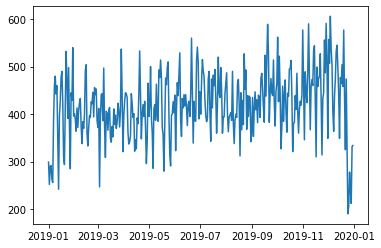

In [26]:
# Create a time series plot showing the number of accidents per day.
plt.plot(daily_casualties)
plt.show()

In [27]:
# Summarise and plot the number of accidents for each weekday, and for each hour of the day.
# NOTE: the reset_index method creates a new column from the row names 
# (try with and without reset_index to see what it does)
acc_weekday = accidents.value_counts('Day_of_Week').to_frame('count').reset_index()
acc_weekday

,Day_of_Week,count
0,6,19056
1,5,17973
2,4,17775
3,3,17598
4,2,16643
5,7,15556
6,1,12935


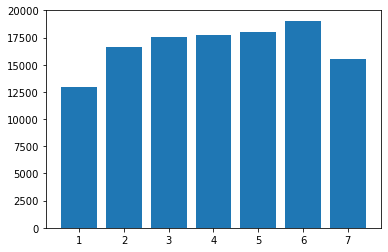

In [28]:
# create a bar plot
plt.bar(acc_weekday['Day_of_Week'], acc_weekday['count'])
plt.show()

In [29]:
accidents['Light_Conditions']

65479     6
14        4
68172     4
58629     6
34803     6
         ..
117423    4
24824     4
79062     6
24822     4
55182     4
Name: Light_Conditions, Length: 117536, dtype: int64

### Questions:

**Beginner level**

1. MORE HERE

**Advanced**

1. Create two data frames `day` and `night` by filtering rows, using the `Light_Conditions` column. Analyse the number and severity of accidents in the two data frames. For example: Are night-time accidents more likely to be fatal?
2. Analyse how the chance of a fatal accident depends on the speed limit.
3. MORE HERE






### Research question

**How did Covid Lockdowns affect the number and severity of traffic accidents compared with years without lockdowns?**

All necessary data can be downloaded from the URL linked at the top. There are no model answers for this question. Use the tools you learned today, and your scientific curiosity to guide your analyses. Do let us know if you find anything interesting and exciting.